In [29]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif

# py -m pip install matplotlib


In [30]:
df_private = pd.read_csv('df_private_dummies.txt', sep="\t")

In [31]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.8, random_state=42)

In [49]:


important_features = [
'Make_BMW', 
'number_of_claims',
'Duration_Long',
'Client_Age',
'Years_of_driving',
'Vehicle_age',
'Duration_Short',
'Renewal',
'Policy_Duration',
'GWP',
'Churn'

]

important_features = [feature for feature in important_features if feature in df_private.columns]

df_filtered = df_private[important_features]

df_filtered['Policy_Type'] = (df_filtered['Duration_Long'] == 1).astype(int)

df_filtered.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

df_filtered.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

mode_value = df_filtered['Renewal'].mode()[0]  
df_filtered['Renewal'].fillna(mode_value, inplace=True)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_9824\1171952624.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Policy_Type'] = (df_filtered['Duration_Long'] == 1).astype(int)
C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_9824\1171952624.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)
C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_9824\1171952624.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [50]:
X = df_filtered.drop(columns=['Churn']) 
y = df_filtered['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.8, random_state=42)

In [34]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [34]:
gamma_range = np.logspace(0, 5, 5)

# Store F1 scores
f1_scores = []

# Evaluate model on each gamma value
for gamma in gamma_range:
    model = SVC(gamma=gamma)
    model.fit(X_train_ht, y_train_ht)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)  # Calculate F1 score
    f1_scores.append(score)

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(gamma_range, f1_scores, marker='o', linestyle='-', color='b')
plt.title('Model F1 Score vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

In [11]:
c_range = [2**k for k in range(5, 15)]

# Store F1 scores
f1_scores = []

# Evaluate model on each gamma value
for c in c_range:
    model = SVC(C=c)
    model.fit(X_train_ht, y_train_ht)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)  # Calculate F1 score
    f1_scores.append(score)

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(c_range, f1_scores, marker='o', linestyle='-', color='b')
plt.title('Model F1 Score vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

In [ ]:
gamma_range = np.logspace(-2, 3, 20)  # Fewer points for computational feasibility
C_range = np.logspace(-2, 2, 20)

# Prepare to collect results
results = []

# Evaluate model for each combination of gamma and C
for C in C_range:
    for gamma in gamma_range:
        model = SVC(gamma=gamma, C=C)
        model.fit(X_train_ht, y_train_ht)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        results.append((gamma, C, score))

# Convert results to a structured format for easy plotting
gammas, Cs, scores = zip(*results)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(gammas, Cs, scores, c=scores, cmap='viridis')
plt.title('F1 Score by Gamma and C')
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_zlabel('F1 Score')
fig.colorbar(scat, label='F1 Score')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [ ]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')

important_features = [
    'GWP', 
    'Churn',  
    'Renewal', 
    'Policy_Duration',
    'Duration_Long', 
    'Duration_Short',
    'Vehicle_age',
    'Years_of_driving',
    'Client_Age',
    'number_of_claims'

]

important_features = [feature for feature in important_features if feature in df_enn.columns]

df_filtered_enn = df_enn[important_features]

df_filtered_enn['Policy_Type'] = (df_filtered_enn['Duration_Long'] == 1).astype(int)

df_filtered_enn.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

df_filtered_enn.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)


X_train_enn = df_filtered_enn.drop('Churn', axis=1)  
y_train_enn = df_filtered_enn['Churn']              

X_train_enn_ht, X_test_enn_ht, y_train_enn_ht, y_test_enn_ht = train_test_split(X_train_enn, y_train_enn, stratify=y_train_enn, test_size=0.7, random_state=42)

In [ ]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')

important_features = [
    'GWP', 
    'Churn',  
    'Renewal', 
    'Policy_Duration',
    'Duration_Long', 
    'Duration_Short',
    'Vehicle_age',
    'Years_of_driving',
    'Client_Age',
    'number_of_claims'

]

important_features = [feature for feature in important_features if feature in df_sm.columns]

df_filtered_sm = df_sm[important_features]

df_filtered_sm['Policy_Type'] = (df_filtered_sm['Duration_Long'] == 1).astype(int)

df_filtered_sm.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

df_filtered_sm.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

mode_value = df_filtered_sm['Renewal'].mode()[0]  
df_filtered_sm['Renewal'].fillna(mode_value, inplace=True)


X_train_sm = df_filtered_sm.drop('Churn', axis=1)  
y_train_sm = df_filtered_sm['Churn']              

X_train_sm_ht, X_test_sm_ht, y_train_sm_ht, y_test_sm_ht = train_test_split(X_train_sm, y_train_sm, stratify=y_train_sm, test_size=0.7, random_state=42)

In [ ]:


important_features = [
    'GWP', 
    'Churn',  
    'Renewal', 
    'Policy_Duration',
    'Duration_Long', 
    'Duration_Short',
    'Vehicle_age',
    'Years_of_driving',
    'Client_Age',
    'number_of_claims'

]

important_features = [feature for feature in important_features if feature in df_private.columns]

df_filtered = df_private[important_features]

df_filtered['Policy_Type'] = (df_filtered['Duration_Long'] == 1).astype(int)

df_filtered.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

df_filtered.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

mode_value = df_filtered['Renewal'].mode()[0]  
df_filtered['Renewal'].fillna(mode_value, inplace=True)

In [20]:
X = df_filtered.drop(columns=['Churn']) 
y = df_filtered['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.8, random_state=42)

In [ ]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [ ]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')

important_features = [
    'GWP', 
    'Churn',  
    'Renewal', 
    'Policy_Duration',
    'Duration_Long', 
    'Duration_Short',
    'Vehicle_age',
    'Years_of_driving',
    'Client_Age',
    'number_of_claims'

]

important_features = [feature for feature in important_features if feature in df_smt.columns]

df_filtered_smt = df_smt[important_features]

df_filtered_smt['Policy_Type'] = (df_filtered_smt['Duration_Long'] == 1).astype(int)

df_filtered_smt.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

df_filtered_smt.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

mode_value = df_filtered_smt['Renewal'].mode()[0]  
df_filtered_smt['Renewal'].fillna(mode_value, inplace=True)

X_train_smt = df_filtered_smt.drop('Churn', axis=1)  
y_train_smt = df_filtered_smt['Churn']              

X_train_smt_ht, X_test_smt_ht, y_train_smt_ht, y_test_smt_ht = train_test_split(X_train_smt, y_train_smt, stratify=y_train_smt, test_size=0.9, random_state=42)

In [ ]:
X_train_smt_ht.info()

In [9]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')

mode_value = df_smt['Renewal'].mode()[0]  
df_smt['Renewal'].fillna(mode_value, inplace=True)

X_train_smt = df_smt.drop('Churn', axis=1)  
y_train_smt = df_smt['Churn']              

X_train_smt_ht, X_test_smt_ht, y_train_smt_ht, y_test_smt_ht = train_test_split(X_train_smt, y_train_smt, stratify=y_train_smt, test_size=0.9, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_3912\839648305.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_smt['Renewal'].fillna(mode_value, inplace=True)


In [23]:
scores = []

def backward_elimination_svm(X, y, initial_features):
    current_features = initial_features.copy()
    best_score = -1  # Start with -1 to ensure any positive score is considered as improvement
    improved = True

    while improved:

        for feature in current_features:
            features_to_test = current_features[:]
            features_to_test.remove(feature)
            # Corrected indexing for DataFrame
            if isinstance(X, pd.DataFrame):
                X_subset = X.iloc[:, features_to_test]
            else:
                X_subset = X[:, features_to_test]
            score = cross_val_score(SVC(kernel='rbf'), X_subset, y, cv=5, scoring=f1_scorer).mean()
            scores.append((score, feature))
        
        scores.sort(reverse=True, key=lambda x: x[0])  # sort by score
        if scores[0][0] > best_score:
            best_score = scores[0][0]
            current_features.remove(scores[0][1])
            improved = True
        else:
            improved = False

    return current_features

# Example usage
# Ensure X_train_smt_ht, y_train_smt_ht, and X_train_smt_ht are correctly defined and X_train_smt_ht is a DataFrame
final_features = backward_elimination_svm(X_train_smt_ht, y_train_smt_ht, list(range(X_train_smt_ht.shape[1])))
X_train_selected = X_train_smt_ht.iloc[:, final_features]

In [26]:
X_train_smt_ht.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14072 entries, 32306 to 112434
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GWP               14072 non-null  float64
 1   Renewal           14072 non-null  float64
 2   Vehicle_age       14072 non-null  float64
 3   Client_Age        14072 non-null  float64
 4   number_of_claims  14072 non-null  float64
dtypes: float64(5)
memory usage: 659.6 KB


In [6]:
selected_columns = ['GWP', 'number_of_claims']

X_train_smt = X_train_smt.loc[:, X_train_smt.columns.intersection(selected_columns)]

X_test = X_test.loc[:, X_test.columns.intersection(selected_columns)]

In [12]:
selected_columns = ['GWP', 'number_of_claims']

X_train_smt_ht = X_train_smt_ht.loc[:, X_train_smt_ht.columns.intersection(selected_columns)]

X_test = X_test.loc[:, X_test.columns.intersection(selected_columns)]

In [ ]:
C_range = [2**k for k in range(-4, 5)]

#gamma_range = np.logspace(-13, 3, 25)  

param_dist={'C': C_range,
                         'gamma':['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']}

svc = SVC()

random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,  
    scoring=f1_scorer,
    cv=5,        
    random_state=42,
    verbose=2
)

random_search.fit(X_train_smt_ht, y_train_smt_ht)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.5}
# Best score: 0.7179054236191649


In [37]:
X_train_ht.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16604 entries, 74726 to 98287
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GWP               16604 non-null  float64
 1   Renewal           16604 non-null  int64  
 2   Vehicle_age       16604 non-null  float64
 3   Client_Age        16604 non-null  float64
 4   number_of_claims  16604 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 778.3 KB


In [ ]:
C_values = [2**k for k in range(2, 11)]

train_results_f1 = []
test_results_f1 = []

for C in C_values:

    svc = SVC(C=C, kernel='rbf')
    svc.fit(X_train_ht, y_train_ht)
    

    train_pred = svc.predict(X_train_ht)
    f1 = f1_score(y_train_ht, train_pred)
    train_results_f1.append(f1)
    

    y_pred = svc.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    test_results_f1.append(f1)


plt.figure(figsize=(10, 6))
line1, = plt.plot(C_values, train_results_f1, 'b', label='Train F1')
line2, = plt.plot(C_values, test_results_f1, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('C Value')
plt.title('F1 Score vs. C Value for SVM Classifier')
plt.xscale('log')  
plt.show()


In [39]:
y_train_ht.info()

<class 'pandas.core.series.Series'>
Index: 16604 entries, 74726 to 98287
Series name: Churn
Non-Null Count  Dtype
--------------  -----
16604 non-null  int64
dtypes: int64(1)
memory usage: 259.4 KB


In [41]:
k = y_train_ht.value_counts()
k


Churn
0    15082
1     1522
Name: count, dtype: int64

In [44]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150816 entries, 0 to 150815
Data columns (total 86 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Vehicle_age                                   150816 non-null  float64
 1   GWP                                           150816 non-null  float64
 2   number_of_claims                              150816 non-null  float64
 3   Renewal                                       142925 non-null  float64
 4   Policy_Duration                               150816 non-null  float64
 5   Client_Age                                    150816 non-null  float64
 6   Years_of_driving                              150816 non-null  float64
 7   PRODUCT_MOD                                   150816 non-null  float64
 8   PRODUCT_MTPL                                  150816 non-null  float64
 9   Duration_Long                                 15

In [46]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')

important_features = [
'Make_BMW', 
'number_of_claims',
'Duration_Long',
'Client_Age',
'Years_of_driving',
'Vehicle_age',
'Duration_Short',
'Renewal',
'Policy_Duration',
'GWP',
'Churn'

]

important_features = [feature for feature in important_features if feature in df_sm.columns]

df_filtered_sm = df_sm[important_features]

df_filtered_sm['Policy_Type'] = (df_filtered_sm['Duration_Long'] == 1).astype(int)

df_filtered_sm.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)

df_filtered_sm.drop(['Policy_Duration', 'Years_of_driving', 'Policy_Type'], axis=1, inplace=True)

mode_value = df_filtered_sm['Renewal'].mode()[0]  
df_filtered_sm['Renewal'].fillna(mode_value, inplace=True)

X_train_sm = df_filtered_sm.drop('Churn', axis=1)  
y_train_sm = df_filtered_sm['Churn']              

X_train_sm_ht, X_test_sm_ht, y_train_sm_ht, y_test_sm_ht = train_test_split(X_train_sm, y_train_sm, stratify=y_train_sm, test_size=0.8, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_9824\1119131970.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_sm['Policy_Type'] = (df_filtered_sm['Duration_Long'] == 1).astype(int)
C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_9824\1119131970.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_sm.drop(['Duration_Short', 'Duration_Long'], axis=1, inplace=True)
C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_9824\1119131970.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [48]:
# Define the range of C values and the parameter distribution
C_range = np.logspace(-5, 5, 11)
# gamma = [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 15]
gamma = ['auto', 'scale']

param_dist = {
    'C': C_range,
    'gamma': gamma,
    'kernel': ['rbf']
}

# Initialize the SVC model
svc = SVC()

# Set up the RandomizedSearchCV with accuracy scoring
random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,
    scoring=f1_scorer,  # Use 'accuracy' as the scoring method
    cv=5,
    random_state=42,
    verbose=2
)

# Fit the model on the training data
random_search.fit(X_train_sm_ht, y_train_sm_ht)

# Print the best parameters and the best score from the random search
print("Best parameters:", random_search.best_params_)
print("Best score (cross-validated accuracy):", random_search.best_score_)

# Evaluate the model on the test set
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_ht)  # Assuming you have a predefined test set X_test, y_test
test_f1 = f1_score(y_test_ht, y_pred_test)
print("F1 score on the test set:", test_f1)






# Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10.0}
# Best score (cross-validated accuracy): 0.7233123091045655

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................C=1e-05, gamma=auto, kernel=rbf; total time=  14.7s
[CV] END ....................C=1e-05, gamma=auto, kernel=rbf; total time=  14.7s
[CV] END ....................C=1e-05, gamma=auto, kernel=rbf; total time=  14.7s
[CV] END ....................C=1e-05, gamma=auto, kernel=rbf; total time=  14.8s
[CV] END ....................C=1e-05, gamma=auto, kernel=rbf; total time=  14.8s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=  11.7s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=  11.9s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=  11.9s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=  12.5s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=  11.8s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  13.5s
[CV] END ......................C=0.1, gamma=auto

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Make_BMW


In [51]:
y_pred_test = best_model.predict(X_test_ht)  # Assuming you have a predefined test set X_test, y_test
test_f1 = f1_score(y_test_ht, y_pred_test)
print("F1 score on the test set:", test_f1)

F1 score on the test set: 0.27468604577038314


In [42]:
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_ht)  # Assuming you have a predefined test set X_test, y_test
test_f1 = f1_score(y_test_ht, y_pred_test)
print("F1 score on the test set:", test_f1)

F1 score on the test set: 0.00196174595389897


Accuracy: 0.5590875553369404
F1: 0.18092518560822388
AUC: 0.7076818813498845


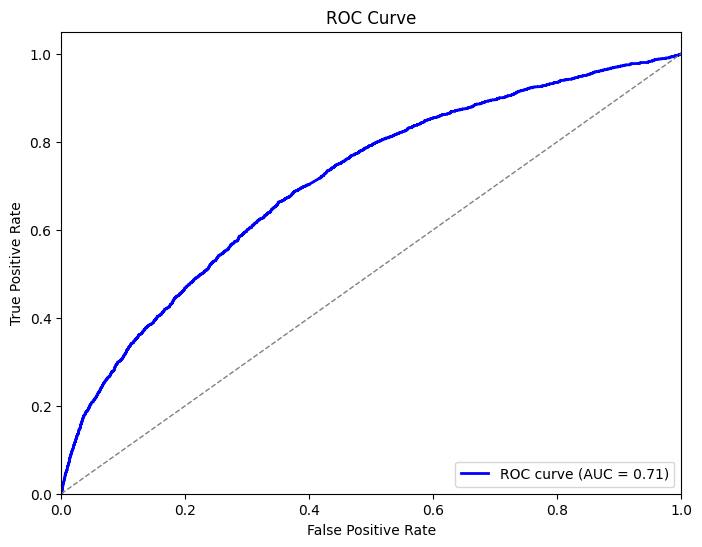

In [14]:
best_model_smt = SVC(kernel='poly', gamma='scale', C=16, probability=True)

best_model_smt.fit(X_train_smt_ht, y_train_smt_ht)

y_pred_smt = best_model_smt.predict(X_test)

accuracy_smt = accuracy_score(y_test, y_pred_smt)
print("Accuracy:", accuracy_smt)

f1_smt = f1_score(y_test, y_pred_smt)
print("F1:", f1_smt)

y_prob_smt = best_model_smt.predict_proba(X_test)[:, 1]

fpr_smt, tpr_smt, thresholds_smt = roc_curve(y_test, y_prob_smt)
auc_score_smt = auc(fpr_smt, tpr_smt)
print("AUC:", auc_score_smt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_smt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.6540518937530743
# F1: 0.20310176333120883
# AUC: 0.7209457611097548


In [11]:
C_range = [2**k for k in range(-2, 5)]

#gamma_range = np.logspace(-13, 3, 25)  

param_dist={'C': C_range,
                         'gamma':['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']}

svc = SVC()

random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_dist,  
    scoring=f1_scorer,
    cv=5,        
    random_state=42,
    verbose=2
)

random_search.fit(X_train_smt_ht, y_train_smt_ht)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


NameError: name 'X_train_smt_ht' is not defined